In [2]:
import xgboost
import os
import csv
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from IPython.display import display
from matplotlib import pyplot as plt

CSV_FILENAME = 'tmp.csv'
data = pd.read_csv(CSV_FILENAME)

pd.options.display.max_columns = None

In [3]:
data.head()

text     score  length  is_ad
0                        ⛓️🔗📿⛓️цЕпочка⛓️📿⛓️🔗📿⛓️🔗📿⛓️🔗  0.894040      27      0
1  Твое лицо ранним утром после фестиваля крафтов...  0.367872      54      0
2  Нет, я не буду вас здесь поздравлять, девочки....  0.453059     619      0
3  Ты прекрасная, нежная женщина,\nНо бываешь сил...  0.366874     762      0
4  #travel #traveling #travelgram #travelling #tr...  0.547780     337      0

In [3]:
X = data.iloc[:, 1:]
Y = data.iloc[:, :1].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y)

In [69]:
model = xgboost.XGBClassifier(silent=False, n_jobs=2, n_estimators=120, colsample_bytree=0.8,
                              learning_rate=0.03, max_depth=6, gamma=0,
                              subsample=1, objective='binary:logistic',  
                              scale_pos_weight=1)



eval_set = [(X_test, y_test)]

eval_res = {}
model.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=10, eval_metric='map', callbacks=[xgboost.callback.record_evaluation(eval_res)])

[02:06:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[0]	validation_0-map:0.394681
Will train until validation_0-map hasn't improved in 10 rounds.
[02:06:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[1]	validation_0-map:0.407576
[02:06:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[2]	validation_0-map:0.415228
[02:06:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[3]	validation_0-map:0.415955
[02:06:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[4]	validation_0-map:0.419241
[02:06:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[5]	validation_0-map:0.428724
[02:06:44] /

[02:06:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[53]	validation_0-map:0.499108
[02:06:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[54]	validation_0-map:0.49999
[02:07:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[55]	validation_0-map:0.500165
[02:07:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[56]	validation_0-map:0.501702
[02:07:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[57]	validation_0-map:0.502669
[02:07:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[58]	validation_0-map:0.507536
[02:07:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roo

[02:07:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[107]	validation_0-map:0.564742
[02:07:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[108]	validation_0-map:0.566962
[02:07:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[109]	validation_0-map:0.568238
[02:07:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[110]	validation_0-map:0.568633
[02:07:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[111]	validation_0-map:0.569768
[02:07:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[112]	validation_0-map:0.571203
[02:07:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.03, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=120,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

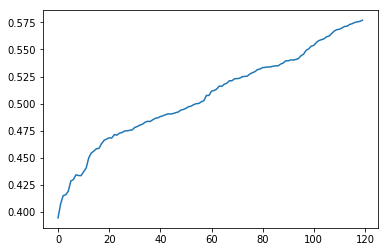

In [70]:
plt.plot(eval_res['validation_0']['map'])
plt.show()

In [1]:
import pickle
with open('2019-01-22 02:10:27.741425 - model - auc96 - maxnodes6.dat', 'rb') as f:
    model = pickle.load(f)

In [2]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

NameError: name 'X_test' is not defined

In [5]:
to_test = pd.read_csv('to_test_only_dtp_fixed.csv')

X = to_test.iloc[:, 1:]
Y = to_test.iloc[:, :1].values.ravel()

y_pred = model.predict(X)

accuracy_dtp = accuracy_score(Y, y_pred)
print("Accuracy_dtp: %.2f%%" % (accuracy_dtp * 100.0))

Accuracy_dtp: 96.67%


In [74]:
# saving model
import pickle
import datetime 

FILE_TO_SAVE = f'{str(datetime.datetime.now())} - model - auc96 - maxnodes6.dat'
pickle.dump(model, open(FILE_TO_SAVE, 'wb'))

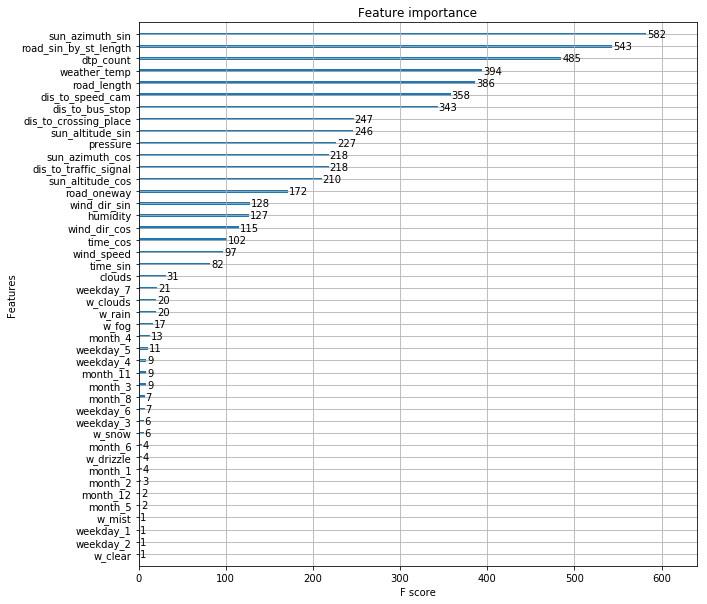

In [6]:
ax = xgboost.plot_importance(model.get_booster(), height=0.2)
fig = ax.figure
fig.set_size_inches(10, 10)

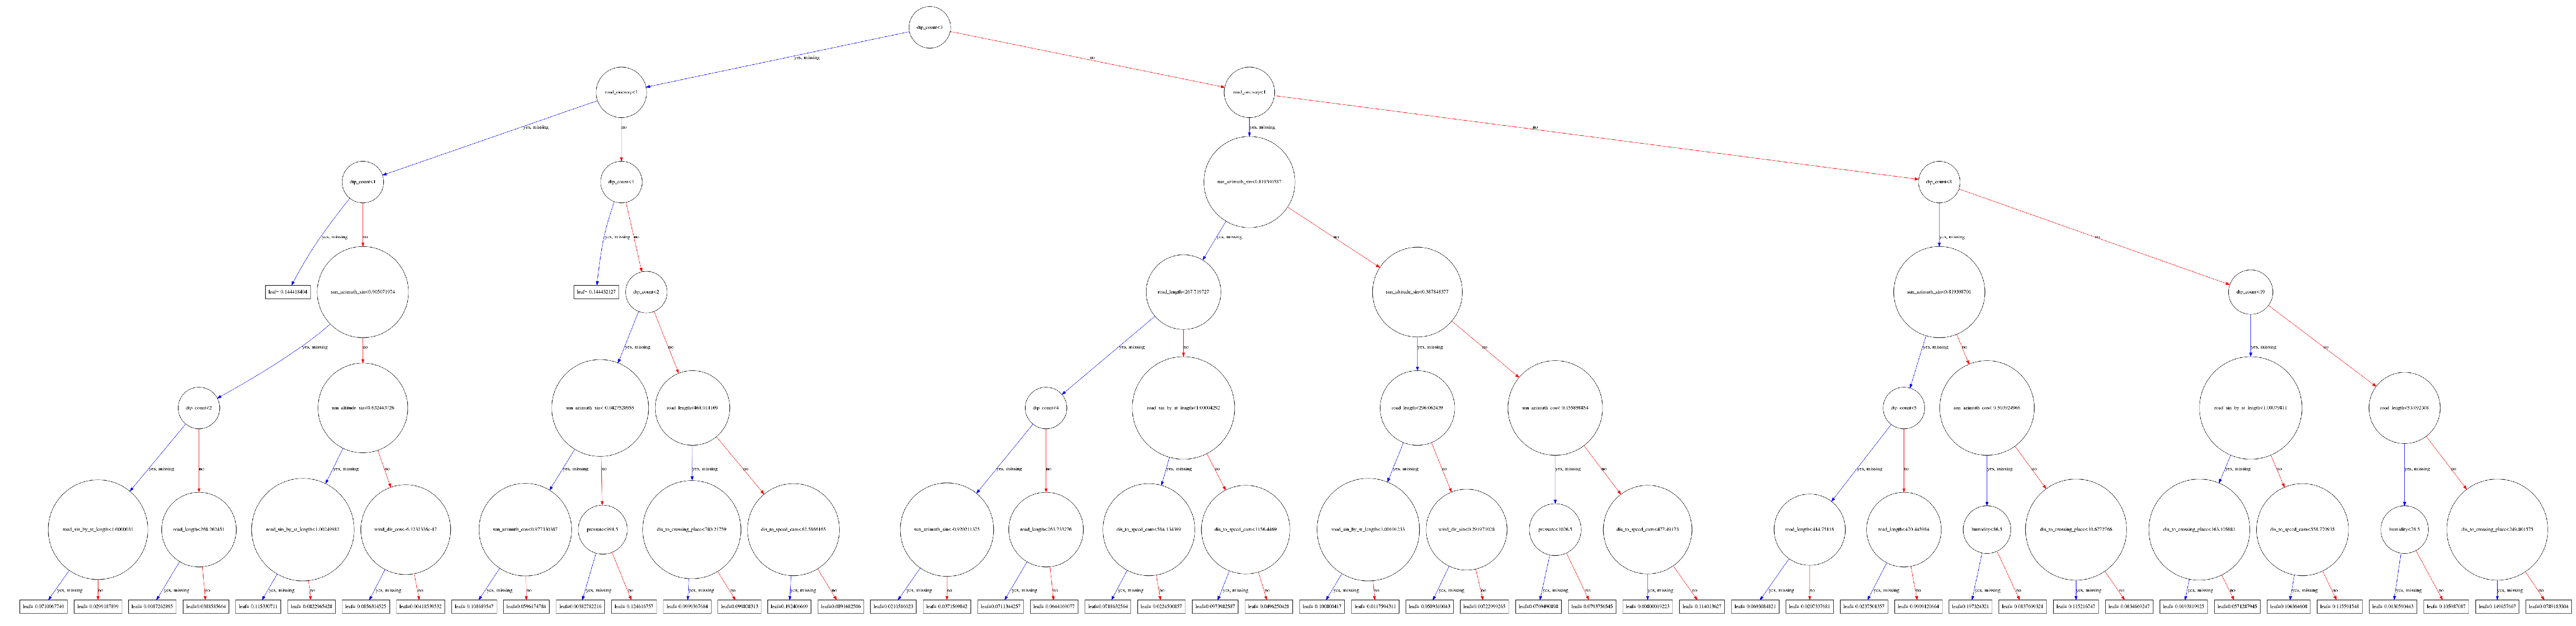

In [15]:
xgboost.plot_tree(model.get_booster(), num_trees=5)
fig = plt.pyplot.gcf()
fig.set_size_inches(100, 100)
fig.savefig('tree5.png')

In [9]:
dataset_to_test = pd.read_csv('negative_samples_to_check.csv')
X = dataset_to_test.iloc[:, 1:]
Y = dataset_to_test.iloc[:, :1].values.ravel()

print(len(Y))

y_pred = model.predict_proba(X)

# accuracy = accuracy_score(Y, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))


print(Y)
print([i[0] for i in y_pred])

41
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[0.72709227, 0.9611293, 0.9863362, 0.862328, 0.8795234, 0.97013324, 0.90832746, 0.9126579, 0.7142085, 0.7285572, 0.83780175, 0.9639812, 0.7807336, 0.75909626, 0.63185227, 0.9750789, 0.9684808, 0.9354424, 0.65585184, 0.9119324, 0.9474858, 0.89778805, 0.9348961, 0.8330077, 0.9409482, 0.5326079, 0.8717845, 0.96826375, 0.9211126, 0.9391346, 0.5905047, 0.8620038, 0.6396007, 0.97540355, 0.90394104, 0.9786107, 0.7852254, 0.93836826, 0.8121792, 0.9128527, 0.86014616]


In [8]:
data = pd.read_csv('negative_samples_to_test.csv')

print(len(data[data.dtp_count == 0]))

85539


In [14]:
display(data[data.sun_altitude_cos > 0].head())

is_dtp  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  \
0       0          0          0          0          0          1          0   
1       0          0          0          0          0          1          0   
2       0          0          1          0          0          0          0   
3       0          0          1          0          0          0          0   
4       0          0          0          1          0          0          0   

   weekday_7  month_1  month_2  month_3  month_4  month_5  month_6  month_7  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   

   month_8  month_9  month_10  month_11  month_12  time_sin  time_cos  \
0        0        1         0         0         0 -0.707107 -0.707107   
1        0        1         0         0         0  0.258819 -0.965926   
2        0        1         0         0         0  0.500000 -0.866025   
3        0        0         0         1         0 -0.965926 -0.258819   
4        0        0         0         1         0 -0.258819  0.965926   

   road_length  road_oneway  road_sin_by_st_length  dis_to_bus_stop  \
0    38.195771            1               1.000000       247.678334   
1     6.803012            1               1.000000       138.643258   
2   368.914424            0               1.000139       244.732454   
3    11.049274            1               1.000000       391.533912   
4   336.031353            0               1.000029       493.370574   

   dis_to_traffic_signal  dis_to_crossing_place  dis_to_speed_cam  \
0             219.040009             122.397021         65.905486   
1             192.999272             173.393624        507.806846   
2            1238.518028             281.179185        392.579121   
3             449.482948             379.655410         57.257998   
4             841.578151             332.801858        261.481797   

   weather_temp  pressure  humidity  wind_speed  wind_dir_cos  wind_dir_sin  \
0         20.00    1018.0      56.0         3.0     -0.984808     -0.173648   
1          7.77    1006.0      89.0         1.0     -0.961262     -0.275637   
2         11.26    1004.0      87.0         6.0     -0.866025     -0.500000   
3         -4.50    1035.0      68.0         4.0     -0.939693      0.342020   
4        -12.01    1009.0      78.0         4.0     -0.939693      0.342020   

   clouds  w_smoke  w_dust  w_thunderstorm  w_rain  w_haze  w_clouds  w_snow  \
0    40.0        0       0               0       0       0         1       0   
1    92.0        0       0               0       1       0         0       0   
2    90.0        0       0               0       0       0         1       0   
3     0.0        0       0               0       0       0         0       0   
4     0.0        0       0               0       0       0         0       1   

   w_clear  w_fog  w_squall  w_mist  w_drizzle  sun_azimuth_sin  \
0        0      0         0       0          0        -0.983725   
1        0      0         0       0          0        -0.154366   
2        0      0         0       0          0         0.333270   
3        1      0         0       0          0        -0.973357   
4        0      0         0       0          0         0.318954   

   sun_azimuth_cos  sun_altitude_sin  sun_altitude_cos  dtp_count  
0        -0.179683          0.432186          0.901785          0  
1        -0.988014          0.774192          0.632951          0  
2        -0.942831          0.827092          0.562067          0  
3        -0.229296         -0.298082          0.954540          0  
4         0.947770         -0.958566          0.284872          0